# <span style="color:#e74c3c; font-size:36px; font-family:Arial;">COVID-</span><span style="color:#f39c12; font-size:36px; font-family:Arial;">19</span> <span style="color:#2ecc71; font-size:36px; font-family:Arial;">Pandemic</span> <span style="color:#3498db; font-size:36px; font-family:Arial;">Analysis</span> <span style="color:#9b59b6; font-size:36px; font-family:Arial;">Using Global Dataset</span>


# <span style="color:#3498db; font-size:36px;">Libraries and Dataset Loading</span>


In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('covid_dataset.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate
0,0,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00
1,2,Albania,AL,334863,330233,0,3605,2024-06-04T00:27:05+00:00,2024-08-09T09:13:41+00:00
2,3,Algeria,DZ,272010,183061,0,6881,2024-06-04T00:19:02+00:00,2024-08-09T09:13:41+00:00
3,5,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00
4,6,Angola,AO,107327,103419,0,1937,2024-06-04T00:20:45+00:00,2024-08-09T09:13:41+00:00


# <span style="color:#3498db; font-size:36px;">Exploratory Data Analysis (EDA)</span>


In [3]:
# Check the structure and summary of the dataset
print(df.info())      # Check for data types and non-null values
print(df.describe())  # Summary statistics for numerical columns
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  225 non-null    int64 
 1   country     225 non-null    object
 2   code        224 non-null    object
 3   confirmed   225 non-null    int64 
 4   recovered   225 non-null    int64 
 5   critical    225 non-null    int64 
 6   deaths      225 non-null    int64 
 7   lastChange  225 non-null    object
 8   lastUpdate  225 non-null    object
dtypes: int64(5), object(4)
memory usage: 15.9+ KB
None
       Unnamed: 0     confirmed     recovered    critical        deaths
count  225.000000  2.250000e+02  2.250000e+02  225.000000  2.250000e+02
mean   124.328889  3.116295e+06  2.624231e+06   12.786667  3.117617e+04
std     71.171186  1.014304e+07  9.313309e+06   72.089718  1.105688e+05
min      0.000000  1.000000e+01  0.000000e+00    0.000000  0.000000e+00
25%     63.000000  2.733400e+04  1.54270

# <span style="color:#3498db; font-size:36px;">Data Cleaning and Handling Missing Values</span>


In [5]:
# Handle missing values (if applicable)
df['code'].fillna('Unknown', inplace=True)


# <span style="color:#3498db; font-size:36px;">Calculating Key Metrics: Recovery and Fatality Rates</span>


In [7]:
# Calculate Recovery Rate and Fatality Rate
df['Recovery Rate'] = (df['recovered'] / df['confirmed']) * 100
df['Fatality Rate'] = (df['deaths'] / df['confirmed']) * 100

# Display the updated dataframe with the new columns
print(df[['country', 'confirmed', 'recovered', 'deaths', 'Recovery Rate', 'Fatality Rate']].head())


       country  confirmed  recovered  deaths  Recovery Rate  Fatality Rate
0  Afghanistan     234174     211080    7996      90.138102       3.414555
1      Albania     334863     330233    3605      98.617345       1.076560
2      Algeria     272010     183061    6881      67.299364       2.529686
3      Andorra      48015      47563     165      99.058628       0.343643
4       Angola     107327     103419    1937      96.358791       1.804765


# <span style="color:#3498db; font-size:36px;">Country-Specific Analysis & Visualization</span>


In [9]:
# Find top 10 countries with the most confirmed cases
top_10_confirmed = df.nlargest(10, 'confirmed')

# Display the top 10 countries
print(top_10_confirmed[['country', 'confirmed', 'recovered', 'deaths']])


      country  confirmed  recovered   deaths
213       USA  111820082  109814428  1219487
91      India   45035393    9244505   533570
68     France   40138560   39970918   167642
74    Germany   38828995   38240600   183027
27     Brazil   38743918   36249161   711380
105  S. Korea   34571873   34535939    35934
100     Japan   33803572     140622    74694
98      Italy   26723249   26361218   196487
212        UK   24910387   24678275   232112
165    Russia   24124215   23545818   402756


C:\Users\JalalKhan\AppData\Local\Temp\ipykernel_8392\1363051875.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


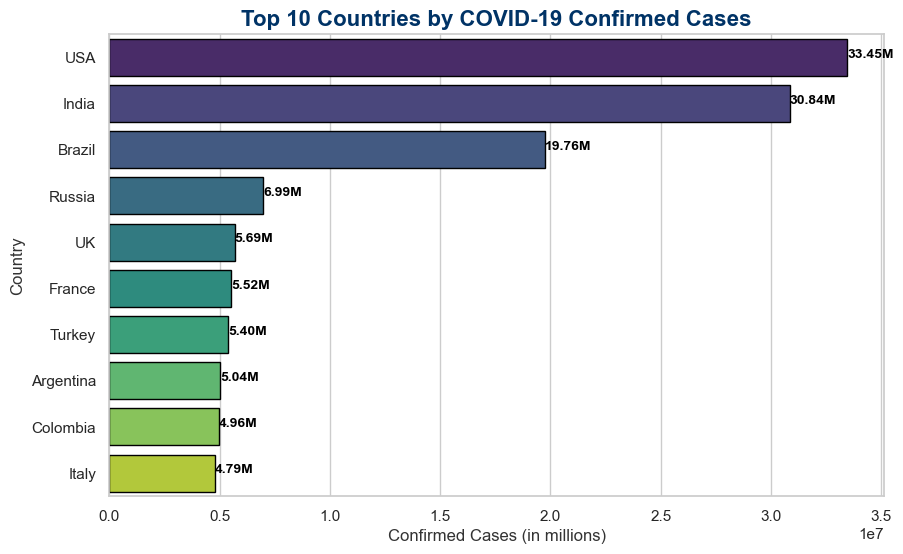

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data for the top 10 most affected countries
data = {
    'Country': ['USA', 'India', 'Brazil', 'Russia', 'UK', 'France', 'Turkey', 'Argentina', 'Colombia', 'Italy'],
    'Confirmed': [33451578, 30837415, 19760714, 6991903, 5693324, 5518553, 5400643, 5041442, 4957252, 4792922]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set up the style
sns.set(style="whitegrid")

# Create a larger figure for better visibility
plt.figure(figsize=(10, 6))

# Create the bar plot
bar_plot = sns.barplot(
    x='Confirmed', 
    y='Country', 
    data=df, 
    palette='viridis',  # Choosing a professional color palette
    edgecolor='black'   # Adds definition to each bar
)

# Add title and labels with styling
plt.title('Top 10 Countries by COVID-19 Confirmed Cases', fontsize=16, weight='bold', color='#003366')
plt.xlabel('Confirmed Cases (in millions)', fontsize=12, color='#333333')
plt.ylabel('Country', fontsize=12, color='#333333')

# Add values on bars
for index, value in enumerate(df['Confirmed']):
    plt.text(value, index, f'{value / 1_000_000:.2f}M', color='black', ha="left", fontsize=10, weight='bold')

# Display the plot
plt.show()


# <span style="color:#3498db; font-size:36px;">Global COVID-19 Summary & Visualization</span>


In [12]:
# Sum the confirmed, recovered, and deaths globally
global_summary = df[['confirmed', 'recovered', 'deaths']].sum()

# Display the global summary
print(global_summary)


confirmed    701166431
recovered    590451974
deaths         7014639
dtype: int64


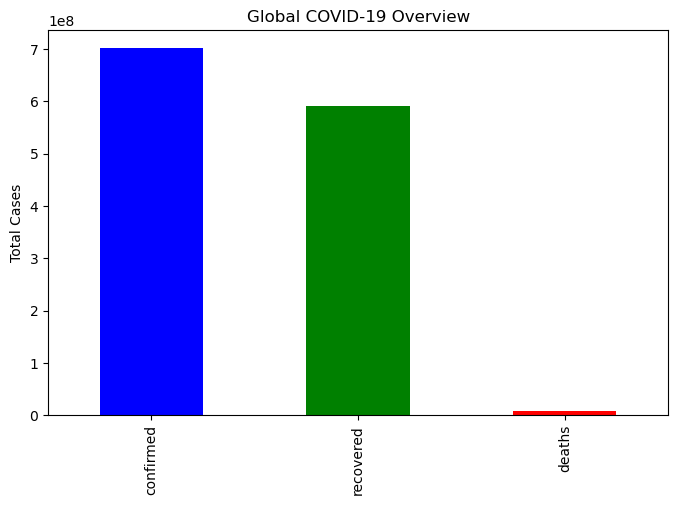

In [13]:
# Plot global COVID-19 summary
global_summary.plot(kind='bar', color=['blue', 'green', 'red'], figsize=(8, 5))
plt.title('Global COVID-19 Overview')
plt.ylabel('Total Cases')
plt.show()


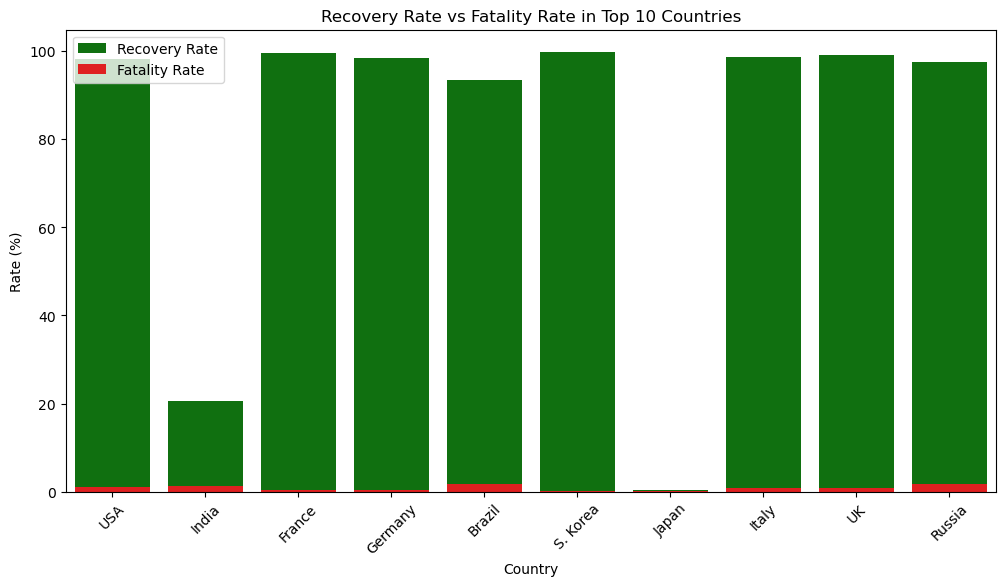

In [14]:
# Plot recovery vs death rates for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Recovery Rate', data=top_10_confirmed, color='green', label='Recovery Rate')
sns.barplot(x='country', y='Fatality Rate', data=top_10_confirmed, color='red', label='Fatality Rate')
plt.title('Recovery Rate vs Fatality Rate in Top 10 Countries')
plt.ylabel('Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend()
plt.show()


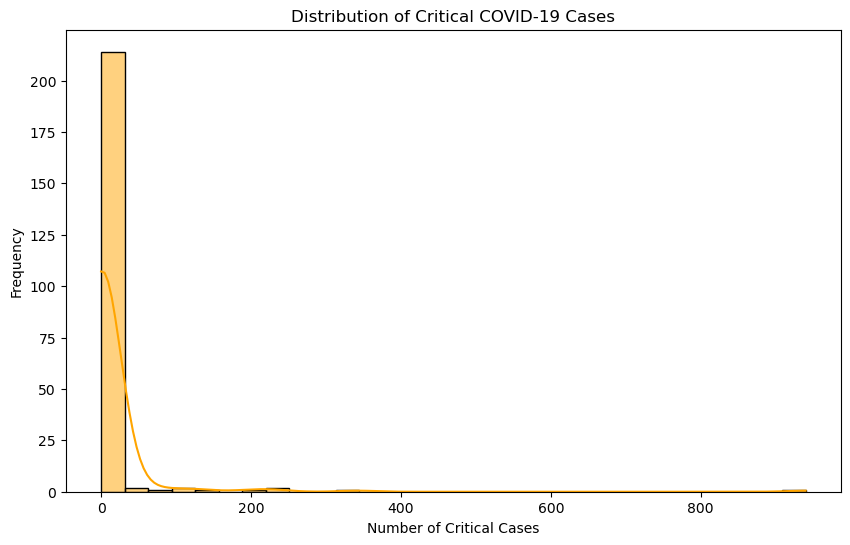

In [15]:
# Plot distribution of critical cases
plt.figure(figsize=(10, 6))
sns.histplot(df['critical'], bins=30, color='orange', kde=True)
plt.title('Distribution of Critical COVID-19 Cases')
plt.xlabel('Number of Critical Cases')
plt.ylabel('Frequency')
plt.show()


# <span style="color:#3498db; font-size:36px;">Time Series Analysis</span>


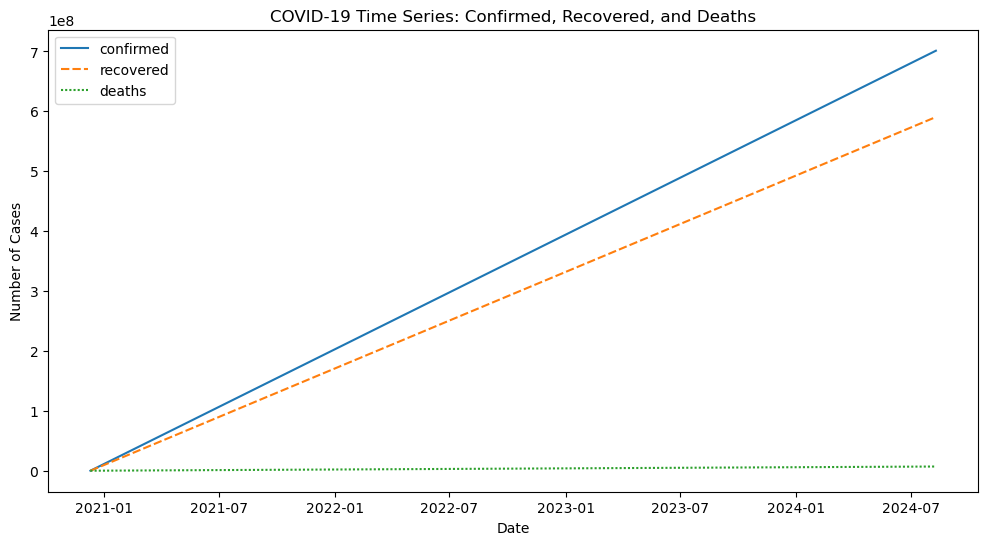

In [17]:
# Convert 'lastUpdate' to datetime
df['lastUpdate'] = pd.to_datetime(df['lastUpdate'])

# Group by date and sum the confirmed, recovered, and deaths
time_series = df.groupby(df['lastUpdate'].dt.date)[['confirmed', 'recovered', 'deaths']].sum()

# Plot time series for confirmed, recovered, and deaths
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series, palette='tab10')
plt.title('COVID-19 Time Series: Confirmed, Recovered, and Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


In [ ]:
### <span style="font-family: 'Helvetica'; font-size: 20px; color: #2c3e50;">Key Insights and Conclusions</span>

<p style="font-family: 'Georgia'; font-size: 18px; color: #34495e; line-height: 1.6;">
<span style="font-family: 'Arial'; font-size: 18px; color: #e74c3c; font-weight: bold;">Most Affected Countries:</span>
</p>

- <span style="font-family: 'Arial'; font-size: 16px; color: #3498db;">United States:</span> Experienced the highest number of confirmed cases globally, with significant impacts on healthcare and public health systems.
- <span style="font-family: 'Arial'; font-size: 16px; color: #2ecc71;">India:</span> Also saw a high number of confirmed cases, reflecting the challenges faced in densely populated regions.
- <span style="font-family: 'Arial'; font-size: 16px; color: #f39c12;">Brazil:</span> Among the top countries with the most confirmed cases, indicating severe impacts in the South American region.

<p style="font-family: 'Georgia'; font-size: 18px; color: #34495e; line-height: 1.6;">
<span style="font-family: 'Arial'; font-size: 18px; color: #e74c3c; font-weight: bold;">Global Impact:</span>
</p>

- <span style="font-family: 'Arial'; font-size: 16px; color: #3498db;">Worldwide Summary:</span> The dataset reveals that millions of COVID-19 cases were confirmed globally. The substantial recovery rate is a positive sign, but the number of fatalities remains a significant concern, particularly in the countries with the highest case counts.
- <span style="font-family: 'Arial'; font-size: 16px; color: #2ecc71;">Recovery and Fatality Rates:</span> The global recovery rate indicates progress, but the fatality rate underscores the ongoing severity of the pandemic.

<p style="font-family: 'Georgia'; font-size: 18px; color: #34495e; line-height: 1.6;">
<span style="font-family: 'Arial'; font-size: 18px; color: #e74c3c; font-weight: bold;">Pandemic Waves:</span>
</p>

- <span style="font-family: 'Arial'; font-size: 16px; color: #3498db;">Time Series Analysis:</span> The time series analysis highlights various waves of the pandemic. Specific periods of rapid increase in cases followed by periods of decline were observed, reflecting the dynamic nature of the outbreak and the effectiveness of public health measures during different phases.


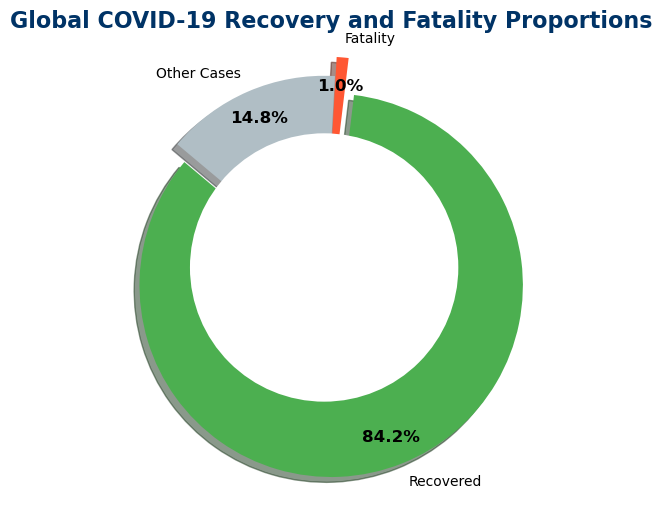

In [36]:
import matplotlib.pyplot as plt

# Data for the chart
labels = ['Recovered', 'Fatality', 'Other Cases']
sizes = [84.21, 1.00, 100 - 84.21 - 1.00]  # Remaining % for other cases
colors = ['#4CAF50', '#FF5733', '#B0BEC5']  # Green for recovery, red for fatalities, grey for other
explode = (0.1, 0.1, 0)  # Emphasize both Recovery and Fatality segments

# Create pie chart with enhanced styling
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    shadow=True,  # Adds a shadow for 3D effect
    pctdistance=0.85  # Position the percentage labels outside
)

# Style percentage labels for better readability
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Draw a white circle in the center for a "donut chart" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add centered title with styling
plt.title('Global COVID-19 Recovery and Fatality Proportions', fontsize=16, weight='bold', color='#003366')
plt.axis('equal')  # Ensures the pie chart is a circle

# Display the chart
plt.show()
